In [1]:
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
from sklearn.decomposition import TruncatedSVD

In [2]:
labels = {
    0: "0", 
    1: "1", 
    2: "2", 
    3: "3", 
    4: "4", 
    5: "5", 
    6: "6", 
    7: "7", 
    8: "8",
    9: "9"
}

In [3]:
X,y = load_digits(return_X_y=True) 
type(X) ,type(y)

(numpy.ndarray, numpy.ndarray)

0


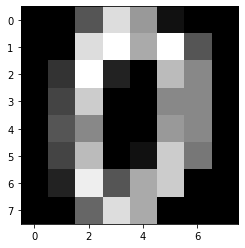

In [4]:
print (y[0])
plt.imshow(np.reshape(X[0,:],(8,8)), cmap="gray")

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_train)
y_train = pd.DataFrame(X_train)
y_test = pd.DataFrame(X_train)


In [7]:
X_test.shape,X_test.shape,y_train.shape , y_test.shape 

((1347, 64), (1347, 64), (1347, 64), (1347, 64))

In [8]:
alpha_matrices={}
for i in range(10):
    alpha_matrices.update({"A"+str(i):X_train.loc[:,list(y_train.loc[0,:]==i)]})
print(alpha_matrices['A0'].shape)

(1347, 30)


In [9]:
from scipy.linalg import svd , norm

In [10]:
left_singular={}
singular_matix={}
right_singular={}
for i in range(1):
    u, s, v_t = svd(alpha_matrices['A'+str(i)], full_matrices=False)
    left_singular.update({"u"+str(i):u})
    singular_matix.update({"s"+str(i):s})
    right_singular.update({"v_t"+str(i):v_t})
print(left_singular['u0'].shape)

(1347, 30)


/home/smhasg/anaconda3/envs/smhasg/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.


KeyError: 'u3'

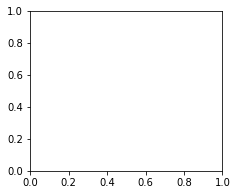

In [11]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(10):
   plt.subplot(10/ columns + 1, columns, i + 1)
   plt.imshow(left_singular["u3"][:,i].reshape(16,16),cmap='binary')
